# Regularized regressions

## Lecture 3

### GRA 4160
### Predictive modelling with machine learning

#### Lecturer: Vegard H. Larsen

# Introduction to linear methods

Linear methods are a class of machine learning algorithms that are based on the idea of finding a linear relationship between the input features and the target variable.
They are widely used for both regression and classification tasks and are particularly useful when the data is linearly separable.

Linear regression is the most well-known linear method.
It is a supervised learning algorithm that is used to predict a continuous target variable from a set of input features.
In linear regression, the goal is to find the line of best fit that minimizes the distance between the predicted values and the actual values.

Logistic regression is another widely used linear method.
It is a classification algorithm that is used to predict a binary outcome (e.g. 0 or 1, Yes or No).
Like linear regression, it is based on the idea of finding the line of best fit, but the line is used to divide the input space into two regions, one for each class.
Logistic regression is often used as a baseline model in classification tasks because it is relatively simple and fast to train, we will look closer at logistic regression in lecture 4.

A linear regression model might not work well in situations with many predictors. In the case with more predictors than observations it will not work at all ($p > n$).

Here are som potential problems when the number of predictors is large:

1. **Overfitting**: It may be able to fit the noise in the data as well as the underlying signal. This can lead to poor generalization performance when making predictions on new unseen data.
2. **High variance**: More likely to have a high variance, meaning that the model's predictions will change a lot depending on the specific training data used.
3. **Difficult to interpret**: Can be difficult to understand which parameters are most important for explaining the outcome, and which parameters are not important.
4. **Hard to estimate the model**: It can be difficult to estimate the parameters accurately from a limited amount of data. This can lead to unreliable parameter estimates and poor model performance.
5. **Multicollinearity**: It is more difficult to identify and deal with multicollinearity, a problem where predictors are correlated with each other. This can lead to instability in the parameter estimates, and make it difficult to identify the true relationship between the predictors and the outcome.
6. **Computational complexity**: Computationally expensive to fit the model and make predictions with it, especially when the data set is large.

Regularization techniques such as Ridge, Lasso and Elastic Net can be used to address these issues by shrinking the coefficients of less important predictors towards zero, thus reducing the number of parameters in the model.

In [1]:
# Generate som toy data

import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

n_samples = 100
n_features = 10

# Generate toy data using make_regression
#X, y = make_regression(n_samples=n_samples, n_features=n_features, n_informative=5, noise=10)

# Generate som toy data manually

# The true vector of coefficients [5.5, 1.75, 1, 0, -2, 0, 0.6, 0, -9.6, 0]
np.random.seed(15)
X = np.random.rand(n_samples, n_features)
y = 5.5*X[:,0] + 1.75*X[:,1] + 1*X[:,2] - 2*X[:,4] + 0.6*X[:,6] - 9.6*X[:,8] + 5.0*np.random.randn(n_samples)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

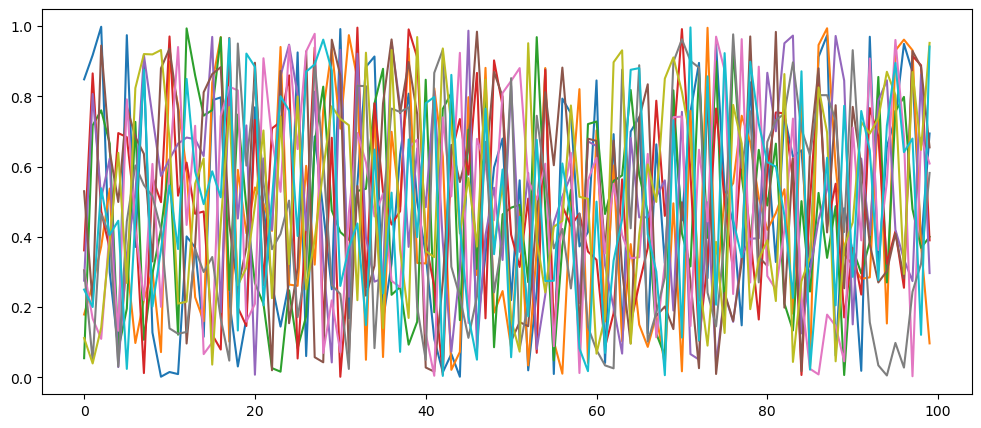

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(X)
plt.show()

## Linear regression (recap)

Linear regression is a method for modeling the relationship between a dependent variable $y$ and one or more independent variables (or predictors) denoted by $X$.
It assumes that the relationship between $y$ and $X$ can be represented by a linear equation.

For multiple linear regression with $n$ predictor variables, the equation can be written as:

$$y = \beta_0 + \beta_1 x_1 + \beta_2x_2 + ... + \beta_n x_n$$

where $x_1, x_2, ..., x_n$ are the independent variables and $\beta_1, \beta_2, ..., \beta_n$ are the coefficients of the respective independent variables.

The goal of linear regression is to find the best-fitting line that minimizes the residual sum of squares (RSS) between the observed values of $y$ and the predicted values of $y$, $\hat{y}$.

$$RSS = \sum_i(y_i - \hat{y}_i)^2 = \sum_i\left(y_i - \beta_0 - \beta_1x_{i1} - \beta_2x_{i2} - ... - \beta_n x_{in}\right) = \sum_i\left(y_i - \beta_0 - \sum_j\beta_jx_{ij}\right)^2$$

where $y_i$ is the $i$-th observed value of $y$ and $\hat{y}_i$ is the corresponding predicted value of $y$.

The coefficients $\beta_0, \beta_1, \beta_2, ..., \beta_n$ can be estimated using the method of least squares.

In [3]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.coef_)

[ 4.66641132  1.54531601  2.09706399 -2.24700274 -2.64803006 -4.09745672
  0.76401839  0.89822429 -8.67122458 -0.19510997]


## Regularized regressions

Regularized regression is a technique used to improve the generalization ability of a linear model by adding a regularization term to the model equation.
The regularization term is a penalty that is applied to the model coefficients/weights and is controlled by a hyperparameter.

The main idea behind regularized regression is to prevent overfitting, which is when a model performs well on the training data but poorly on unseen data.
Overfitting can occur when the model has too many degrees of freedom and is able to fit the training data perfectly, but is not able to generalize to new data.

There are several types of regularized regression, including ridge regression, lasso regression, and elastic net.
Each type of regularized regression uses a different form of the regularization term, which results in different behavior and properties of the model.
Regularization is achieved by adding a term to the cost function that penalizes the model for having large coefficients.
This term is typically a function of the magnitude of the coefficients, such as the L1 norm (Lasso) or the L2 norm (Ridge).
By adding this term, the optimization algorithm will balance the goal of fitting the training data well with the goal of having small coefficients.

## Ridge regression

The penalty term, known as the "ridge parameter" $\lambda$, controls the strength of the regularization.
When $\lambda$ is set to zero, Ridge Regression becomes the same as linear regression, and as $\lambda$ increases, the coefficients of the model become smaller, which can help to reduce overfitting.

In Ridge Regression, the cost function is the sum of the squared residuals (also known as the "least squares") and the "L2 regularization term".
The L2 regularization term is the sum of the squares of the coefficients, multiplied by the ridge parameter.

The cost function for Ridge Regression is defined as:

$$J^{\text{ridge}}(\mathbf{\beta}) = \frac{1}{2n}\sum_i\left(y_i - \beta_0 - \sum_j\beta_jx_{ij}\right)^2 + \lambda_r \sum_j \beta_j^2,$$

where $\mathbf{\beta}$ is the vector of coefficients, $x_{ij}$ is the $j$th feature of the ith observation, $y_i$ is the target variable for the $i$th observation, $n$ is the number of observations and $\lambda_r$ is the ridge parameter.

The Ridge Regression algorithm finds the values of the coefficients that minimize the cost function.
This is done by using optimization techniques such as gradient descent, or by solving the normal equations.
As with the linear regression model, ridge regression has a closed form solution.
Once the optimal values of the coefficients have been found, the Ridge Regression model can be used to make predictions on new data.

Ridge Regression is helps with overfitting and is also useful in cases where the number of features is larger than the number of observations, as it can help to prevent the model from becoming over-specified.

In [4]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.8)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 4.27719127  1.40510861  2.19887963 -2.05421924 -2.23247916 -3.70431413
  0.61717232  0.80001056 -7.60033337 -0.15918099]


## Least Absolute Shrinkage and Selection Operator (LASSO) regression

Lasso regression is also a type of linear regression that adds a different type of regularization term to the cost function.
The regularization term is the absolute value of the sum of the coefficients, multiplied by the regularization parameter.
The goal of lasso regression is to minimize the sum of the squared errors of the model, subject to the constraint that the sum of the absolute values of the coefficients is less than a fixed value.

The cost function for Lasso Regression is defined as:

$$J^{\text{lasso}}(\mathbf{\beta}) = \frac{1}{2n}\sum_i\left(y_i - \beta_0 - \sum_j\beta_jx_{ij}\right)^2 + \lambda_l \sum_j|\beta_j|,$$

where where $\mathbf{\beta}$ is the vector of coefficients, $x_{ij}$ is the $j$th feature of the ith observation, $y_i$ is the target variable for the ith observation, $n$ is the number of observations and $\lambda_l$ is the lasso parameter.

The lasso regression algorithm works by iteratively adjusting the coefficients of the model in such a way as to minimize the cost function.
At each iteration, the algorithm looks at the gradient of the cost function with respect to each coefficient, and adjusts the coefficient in the opposite direction of the gradient, subject to the constraint that the sum of the absolute values of the coefficients is less than a fixed value.
This process continues until the cost function is minimized, or until a maximum number of iterations is reached.

The main advantage of lasso regression is that it can be used to automatically select a subset of features that are most important in predicting the target variable.
Because the lasso algorithm shrinks the coefficients of less important features towards zero, it effectively eliminates those features from the model.
This feature selection is especially useful when the number of features is large, as it can help to reduce overfitting and improve the interpretability of the model.

In [5]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 3.78905786  0.52088693  2.07723694 -1.20311347 -1.32725437 -3.1988485
  0.          0.         -7.17367499  0.        ]


## Elastic net

Elastic Net regression combines the L1 regularization term of Lasso regression and the L2 regularization term of Ridge regression into one model.
The cost function for Elastic Net regression is a combination of the mean squared error (MSE) and the L1 and L2 regularization terms.
The L1 regularization term is the sum of the absolute values of the coefficients, and the L2 regularization term is the sum of the squares of the coefficients.

The cost function for Elastic net regression is defined as:

$$J^{\text{elastic net}}(\mathbf{\beta}) = \frac{1}{2n}\sum_i\left(y_i - \beta_0 - \sum_j\beta_jx_{ij}\right)^2 + \lambda_{e} \left( (1-\alpha)\sum_j \beta_j^2 + \alpha \sum_j|\beta_j|\right),$$

where where $\mathbf{\beta}$ is the vector of coefficients, $x_{ij}$ is the $j$th feature of the ith observation, $y_i$ is the target variable for the ith observation, $n$ is the number of observations.
$\lambda_e$ is the regularization parameter, which controls the strength of the regularization term.
It is a scalar value that is chosen by the user.
$\alpha$ is the mixing parameter between L1 and L2 regularization. When $\alpha=0$, it becomes a Ridge Regression and when $\alpha=1$, it becomes Lasso Regression

The goal of Elastic Net regression is to minimize the cost function, subject to the constraint that the sum of the absolute values of the coefficients and the sum of the squares of the coefficients are less than fixed values.

The Elastic Net regression algorithm works by iteratively adjusting the coefficients of the model in such a way as to minimize the cost function in the same way as for lasso regression.

The main advantage of Elastic Net regression is that it can handle correlated predictors better than Lasso regression, as Lasso tends to select only one of the correlated predictors, whereas Elastic Net will give non-zero coefficients to both.
Additionally, Elastic Net is a good choice when the number of predictors is relatively large compared to the number of observations because it can help to reduce overfitting and improve the interpretability of the model.
The parameter $\alpha$ controls the balance between L1 and L2 regularization term.

Note that in Scikit-learn the parameter `alpha` is the same as we here call $\lambda$. What we call $\alpha$ is called `l1_ratio` in Scikit-learn.

In [6]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=0.1, l1_ratio=0.5)
en.fit(X_train, y_train)
print(en.coef_)

[ 2.92177487  0.75918837  1.92784433 -1.22486922 -1.03115498 -2.39525919
  0.          0.21852892 -4.70707567 -0.        ]


## Compare the Mean Squared Error of the different models

In [7]:
from sklearn.metrics import mean_squared_error

y_pred_lm = lm.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_en = en.predict(X_test)

mse_lm = mean_squared_error(y_test, y_pred_lm)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_en = mean_squared_error(y_test, y_pred_en)

print("Mean Squared Error (Linear model):", mse_lm.round(4))
print("Mean Squared Error (Ridge):", mse_ridge.round(4))
print("Mean Squared Error (Lasso):", mse_lasso.round(4))
print("Mean Squared Error (Elastic Net):", mse_en.round(4))

Mean Squared Error (Linear model): 20.7316
Mean Squared Error (Ridge): 19.9094
Mean Squared Error (Lasso): 19.7805
Mean Squared Error (Elastic Net): 19.7715


## Selecting the hyperparameters  (the $\lambda$'s and $\alpha$)

# LARS (Least Angle Regression)

LARS (Least Angle Regression) is an algorithm for fitting linear models to high-dimensional data, and is particularly useful for estimating Lasso models (L1 regularized linear regression).
The LARS algorithm is similar to the Lasso algorithm, but it has the computational advantage of being much faster than traditional optimization methods for estimating Lasso models.

The LARS algorithm works by iteratively adding one variable at a time to the model, where each variable is chosen based on the correlation with the response variable.
The algorithm starts with an empty model and at each step, it finds the variable that has the highest correlation with the residuals of the current model.
This variable is then added to the model and the coefficients are updated by moving along the L1 constraint boundary.

The LARS algorithm stops when all the variables have been added to the model, or when the number of variables reaches a pre-specified maximum.
The LARS algorithm also allows for the estimation of the Lasso path, which is a set of Lasso models for different values of the regularization parameter.

The LARS algorithm has some important properties:

1. As it is a forward stepwise method, it is computationally efficient.
2. It is numerically stable, and it can handle highly correlated predictor variables.
3. It is useful for variable selection as it can handle a large number of features, and it does not require a tuning parameter.

Scikit-learn has a Lars class in `sklearn.linear_model` which implements LARS algorithm.

It has several options to control the behavior of the algorithm, including the ability to specify the maximum number of variables to include in the model, and the ability to calculate the Lasso path.

Let us calculate the Lasso path using the LARS algorithm

.

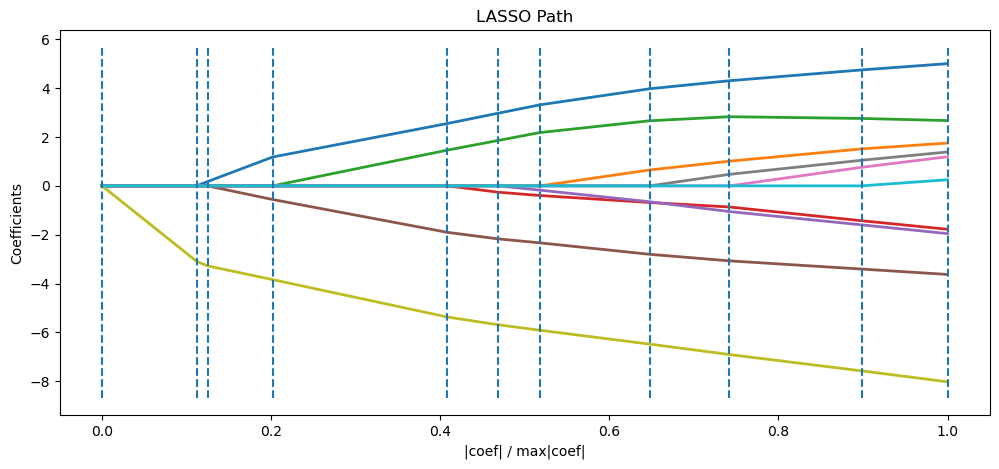

In [8]:
from sklearn.linear_model import lars_path

_, _, coefs = lars_path(X_train, y_train, method="lasso", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(12,5))
plt.plot(xx, coefs.T, lw=2)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()

In [9]:
# What features survive
import pandas as pd
pd.DataFrame(coefs.T)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.092265,0.000000
2,0.174416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.275173,0.000000
3,1.181394,0.000000,0.000000,0.000000,0.000000,-0.559653,0.000000,0.000000,-3.840422,0.000000
4,2.553196,0.000000,1.463054,0.000000,0.000000,-1.903741,0.000000,0.000000,-5.370857,0.000000
5,2.975713,0.000000,1.860554,-0.260872,0.000000,-2.172456,0.000000,0.000000,-5.689768,0.000000
6,3.318728,0.000000,2.183332,-0.395880,-0.176759,-2.334114,0.000000,0.000000,-5.913308,0.000000
7,3.975818,0.650795,2.665311,-0.681418,-0.651251,-2.803097,0.000000,0.000000,-6.480425,0.000000
8,4.304610,1.010091,2.831657,-0.865436,-1.052757,-3.071430,0.000000,0.472077,-6.907407,0.000000
9,4.747332,1.513213,2.760231,-1.427747,-1.596931,-3.406949,0.759838,1.048090,-7.575558,0.000000
